## Imports

In [3]:
pip install pyccel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 4.4 MB/s 
     |████████████████████████████████| 74 kB 4.3 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 


In [4]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [14]:
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    for n in range(nt + 1): ##loop across number of time steps
        for j in range(row):
            for i in range(col):
                un[j][i] = u[j][i]
                vn[j][i] = v[j][i]
        for j in range(1, row):
            for i in range(1, col):
                u[j, i] = (un[j, i] - (un[j, i] * dt / dx * (un[j, i] - un[j, i - 1])) -
                                      (vn[j, i]  * dt / dy * (un[j, i] - un[j - 1, i])))
                v[j, i] = (vn[j, i] - (un[j, i]  * dt / dx * (vn[j, i] - vn[j, i - 1])) -
                                      (vn[j, i]  * dt / dy * (vn[j, i] - vn[j - 1, i])))
                
                
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
        
    return 0

## Numba accelerator

In [15]:
@njit(fastmath=True)
def solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    for n in range(nt + 1): ##loop across number of time steps
        for j in range(row):
            for i in range(col):
                un[j][i] = u[j][i]
                vn[j][i] = v[j][i]
        for j in range(1, row):
            for i in range(1, col):
                u[j, i] = (un[j, i] - (un[j, i] * dt / dx * (un[j, i] - un[j, i - 1])) -
                                      (vn[j, i]  * dt / dy * (un[j, i] - un[j - 1, i])))
                v[j, i] = (vn[j, i] - (un[j, i]  * dt / dx * (vn[j, i] - vn[j, i - 1])) -
                                      (vn[j, i]  * dt / dy * (vn[j, i] - vn[j - 1, i])))
                
                
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
        
    return 0

## Pyccel accelerator

In [16]:
@types('float[:,:]','float[:,:]','float[:,:]','float[:,:]', 'int','float', 'float', 'float', 'float')
def solve_2d_nonlinearconv_pyccel(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    for n in range(nt + 1): ##loop across number of time steps
        for j in range(row):
            for i in range(col):
                un[j][i] = u[j][i]
                vn[j][i] = v[j][i]
        for j in range(1, row):
            for i in range(1, col):
                u[j, i] = (un[j, i] - (un[j, i] * dt / dx * (un[j, i] - un[j, i - 1])) -
                                      (vn[j, i]  * dt / dy * (un[j, i] - un[j - 1, i])))
                v[j, i] = (vn[j, i] - (un[j, i]  * dt / dx * (vn[j, i] - vn[j, i - 1])) -
                                      (vn[j, i]  * dt / dy * (vn[j, i] - vn[j - 1, i])))
                
                
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
        
    return 0

## Inputs

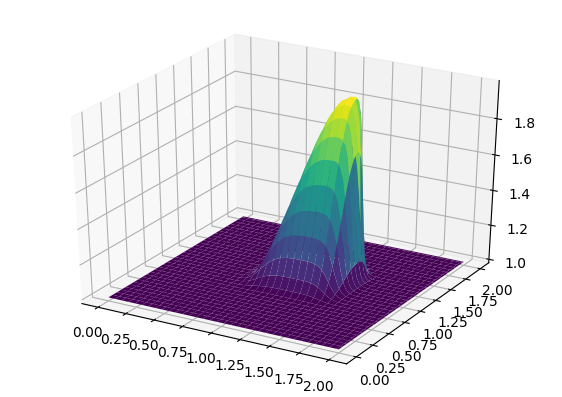

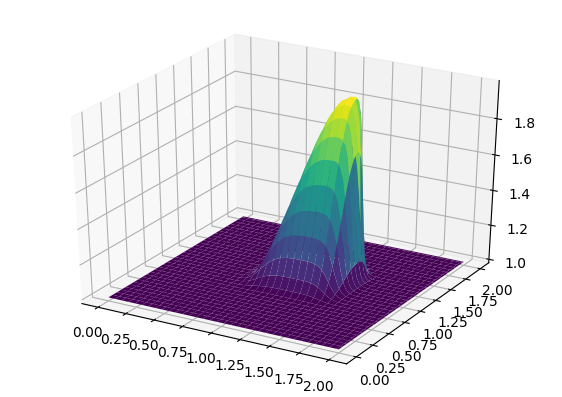

In [22]:
###variable declarations
nx = 101
ny = 101
nt = 80
c = 1.
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))     

solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

## Call Funtions

### Pure function

In [23]:
%timeit solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

1 loop, best of 5: 4.09 s per loop


### Function with numba accelerator

In [24]:
%timeit solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c)

The slowest run took 200.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 5 ms per loop


### Function with pyccel accelerator

In [25]:
solve_2d_nonlinearconv_f90 = epyccel(solve_2d_nonlinearconv_pyccel)

In [26]:
%timeit solve_2d_nonlinearconv_f90(u, un, v, vn, nt, dt, dx, dy, c)

100 loops, best of 5: 4.56 ms per loop
